# Objectifs

Ce carnet vise à décrire et mettre en oeuvre certains des algorithmes de détection de contours les plus répandus.
<br>
<br>Pour des raisons de simplicité :
* Nous nous limiterons aux modèles du premier et second ordre.
* Nous utiliserons des librairies standard pour les opérations de convolution et de pré-traitement.

Pour un rappel sur la détection de contours en général, se référer à l'article suivant : <a href="https://fr.wikipedia.org/wiki/D%C3%A9tection_de_contours">Wikipédia</a>.


# Catalogue des algorithmes

## Sobel

<br>Soit $\mathbf{A}$ l'image source. L'opérateur utilise des matrices de convolution de taille 3×3.
<br>Une convolution de ces matrices avec l'image permet de calculer des approximations des dérivées horizontale ($\mathbf {G_{x}}$) et verticale ($\mathbf {G_{y}}$).

${\mathbf  {G_{x}}}={\begin{bmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{bmatrix}}*{\mathbf  {A}}\quad {\mbox{et}}\quad {\mathbf  {G_{y}}}={\begin{bmatrix}-1&-2&-1\\0&0&0\\1&2&1\end{bmatrix}}*{\mathbf  {A}}$

<br>En chaque point, les approximations des gradients horizontaux et verticaux peuvent être combinées comme suit pour obtenir une approximation de la norme du gradient:
<br>${\mathbf  {G}}={\sqrt  {{\mathbf  {G_{x}}}^{2}+{\mathbf  {G_{y}}}^{2}}}$

On peut également calculer la direction du gradient comme suit :
<br>${\mathbf  {\Theta }}=\arctan\left({{\mathbf  {G_{y}}},{\mathbf  {G_{x}}}}\right)$

**Remarques**
* Le filtre de Sobel est le filtre de détection de contour **le plus commun**. Il extrêmement simple et facile à mettre en oeuvre tout en proposant un niveau de performance très satisfaisant.
* Ce type de filtre s'applique à une image en niveau de gris. Seule l'intensité lumineuse rentre en jeu.
* Le noyau de convolution peut être décomposé pour le rendre encore plus rapide et léger :
<br>
<br>${\begin{bmatrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{bmatrix}}={\begin{bmatrix}1\\2\\1\end{bmatrix}}.{\begin{bmatrix}-1&0&+1\end{bmatrix}} 
\quad {\mbox{et}}\quad 
{\begin{bmatrix}-1&-2&-1\\0&0&0\\+1&+2&+1\end{bmatrix}}={\begin{bmatrix}-1\\0\\+1\end{bmatrix}}.{\begin{bmatrix}1&2&1\end{bmatrix}}$
<br>
<br>Les composantes du gradient se calculent alors comme suit :
<br>
<br>${\mathbf {G_{x}} ={\begin{bmatrix}1\\2\\1\end{bmatrix}}.({\begin{bmatrix}-1&0&+1\end{bmatrix}}*\mathbf {A} )
\quad {\mbox{et}}\quad
\mathbf {G_{y}} ={\begin{bmatrix}-1\\0\\+1\end{bmatrix}}.({\begin{bmatrix}1&2&1\end{bmatrix}}*\mathbf {A} )}$
<br>
<br>La **séparabilité peut être mise à profit** dans certains types d'implémentation pour permettre moins d'opérations lors du calcul.
* Ces formules montrent que la dérivation dans une direction équivant à un lissage triangulaire dans la direction opposée destiné à éliminer les « faux contours » suivi du calcul discret de la dérivée $\frac {\partial A}{\partial x}(x)=A(x+1)-A(x-1)$. 
* Ma même technique étant utilisée dans le filtre de Prewitt avec un lissage rectangulaire qui introduit des changements de phase.

**Sources**
<br>\- Article Wikipedia : <a href="https://fr.wikipedia.org/wiki/Filtre_de_Sobel">Filtre de Sobel</a>.
<br>\- Article sur les opérateurs de dérivation du premier ordre : <a href="https://theailearner.com/2019/05/24/first-order-derivative-kernels-for-edge-detection/">TheAILearner</a>.
<br>\- Rappel sur le lissage d'images : <a href="https://fr.wikipedia.org/wiki/Lissage_d%27images">Lissage d'images</a>.

## Prewitt

L'approche et le formalise sont très similaire avec le filtre de Sobel :
<br>
<br>${ \mathbf {G_{x}} ={\begin{bmatrix}-1&0&+1\\-1&0&+1\\-1&0&+1\end{bmatrix}}*\mathbf {A} \quad {\mbox{et}}\quad \mathbf {G_{y}} ={\begin{bmatrix}-1&-1&-1\\0&0&0\\+1&+1&+1\end{bmatrix}}*\mathbf {A} }$
<br>
<br>L'amplitude du gradient se calcule via la norme du vecteur ainsi défini en tout point :
<br>${\mathbf {G} ={\sqrt {{\mathbf {G} _{x}}^{2}+{\mathbf {G} _{y}}^{2}}}}$
<br>
<br>De même, nous pouvons calculer sa direction :
<br>${ \mathbf {\Theta } =\arctan \left({\mathbf {G} _{y},\mathbf {G} _{x}}\right)}$

**Remarques**
* Ce noyau de convolution est aussi séparable dans les deux directions, par exemple $\mathbf {G} _{x}$ peut s'écrire :
<br>
<br>${{\begin{bmatrix}-1&0&+1\\-1&0&+1\\-1&0&+1\end{bmatrix}}={\begin{bmatrix}1\\1\\1\end{bmatrix}}{\begin{bmatrix}-1&0&1\end{bmatrix}}}$
<br>
<br>
* Ces formules montrent que la dérivation dans une direction équivant à un lissage rectangulaire (ou uniforme) dans la direction opposée destiné à éliminer les « faux contours » suivi du calcul discret de la dérivée $\frac {\partial A}{\partial x}(x)=A(x+1)-A(x-1)$. 
* Sobel est souvent préféré à Prewitt pour sa capacité à mieux supprimer le bruit (même si les deux restent très similaire dans l'approche). En effet, le lissage avec Prewitt se base sur la fonction porte qui a une composition spectrale beaucoup plus étandue que la fonction triangle utilisée dans Sobel.

**Sources**
<br>\- Article Wikipedia : <a href="https://fr.wikipedia.org/wiki/Filtre_de_Prewitt">Filtre de Prewitt</a>.
<br>\- Argument sur la comparaison entre Sobel et Prewitt : <a href="https://www.quora.com/Why-is-Sobel-edge-detection-preferred-over-Prewitt-edge-detection">Forum Quora</a>.

## Roberts cross

Ce filtre a été proposé en 1963 pour approximer le calcul du gradient sur une image grâce à un opérateur discret avec les objectifs suivants :
* Contours nets.
* Bruit dû à l'arrière plan le plus faible possible.
* Intensité des contours similaire à l'intensité perçue par un oeil humain.

<br>Les équations proposées sont :
<br>$I'_{{i,j}}={\sqrt  {I_{{i,j}}}}$
<br>$z_{{i,j}}={\sqrt  {(I'_{{i,j}}-I'_{{i+1,j+1}})^{2}+(I'_{{i+1,j}}-I'_{{i,j+1}})^{2}}}$

L'implémention avec un noyau de convolution est la suivante :
<br>
<br>${\mathbf {G_{x}} = \begin{bmatrix}+1&0\\0&-1\\\end{bmatrix}}*{\mathbf  {A}} 
\quad {\mbox{et}}\quad 
{\mathbf {G_{x}} = \begin{bmatrix}0&+1\\-1&0\\\end{bmatrix}}*{\mathbf  {A}}$
<br>
<br>L'amplitude du gradient se calcule :
<br>$\nabla I=||{\mathbf G}||_2={\sqrt  {{\mathbf G_{x}}^{2}+ {\mathbf G_{y}}^{2}}}$
<br>
<br>De même, nous pouvons calculer sa direction :
<br>${ \mathbf {\Theta } =\arctan \left({\mathbf {G} _{y},\mathbf {G} _{x}}\right)}$

**Remarques**
* Ce filtre a l'avantage d'être le plus léger et le plus rapide car ne prend en compte que 4 pixels à la fois.
* Aujourd'hui la puissance des machines est telle que cet avantage n'est plus décisif. Les filtres de Sobel, Prewitt seront souvent préférés.

**Sources**
<br>\- Article Wikipedia : <a href="https://en.wikipedia.org/wiki/Roberts_cross">Roberts cross</a>.

## Laplace

Les filtres ci-dessus sont des filtres du premier ordre pour lesquels les contours sont représentés par des variations importantes de l'intensité et donc des valeurs importantes de l'amplitude du gradient.
<br>Le filtre de Laplace est un filtre du second ordre qui permet de mettre en avant les maxima et les minima locaux (la où le gradient s'annule).
<br>
<br>Pour rappel le Laplacien s'écrit :<center>${\mathbf \nabla}^2 = \frac {\partial^2 }{{\partial x}^2} + \frac {\partial^2 }{{\partial y}^2}$</center>

Il est possible d'approximer les dérivées partielles par des opérateurs discrets :
<br>$\frac {\partial^2 A}{{\partial x}^2} \sim f(x+1) -2f(x) + f(x-1)
\quad {\mbox{et}}\quad 
\frac {\partial^2 A}{{\partial y}^2} \sim f(y+1) -2f(y) + f(y-1) $

Le noyau de convolution pour chaque composante s'écrit :
<br>${\mathbf {L_{x}} = \begin{bmatrix}+1&-2&-1\\\end{bmatrix}}*{\mathbf  {A}} 
\quad {\mbox{et}}\quad 
{\mathbf {L_{y}} = \begin{bmatrix}+1\\-2\\-1\\\end{bmatrix}}*{\mathbf  {A}}$

En additionnant les deux composantes, le noyau global devient :
<br>
<br><center>${\mathbf {\nabla}^{2}}={\begin{bmatrix}0&0&0\\1&-2&1\\0&0&0\end{bmatrix}}+
{\begin{bmatrix}0&1&0\\0&-2&0\\0&1&0\end{bmatrix}}=
{\begin{bmatrix}0&1&0\\1&-4&1\\0&1&0\end{bmatrix}}$</center>

**Remarques**
* Le filtre de Laplace n'utilise qu'un seul noyau, alors que deux sont nécessaires pour les filtres du premier ordre. Malheureusement l'information sur l'orientation du contour est perdue.
* Ce filtre est "isotrope" est rend une intensité équivalente qu'importe l'orientation du contour (il est possible d'adopter d'autres variantes isotropes aussi en ajustant les coefficients en diagonal).
* La somme des coefficient de ce noyau est 0, comme pour les filtres du premier ordre. Ceci assure que les régions uniformes sont supprimées dans l'image en sortie.
* Comme pour les filtres du premier ordre, le filtre de Laplace est très sensible au bruit. Il est possible de réduire cet effet en appliquant en premier un filtre Gaussien ($\mathbf K_{Gauss}$) à l'ensemble de l'image: ${\mathbf {\nabla}^{2}}(I*{\mathbf K_{Gauss}}) = I*{\mathbf {\nabla}^{2}}{\mathbf K_{Gauss}}$

Ce filtre composé, s'appelle **Laplacian of Gaussian (LoG)** :
<br><center>$LoG = {{\nabla}^{2}}{\mathbf K_{Gauss}}={- \frac {1}{\pi \sigma^4}}{\left[1 - \frac {x^{2}+y^{2}}{2 \sigma^2} \right]}e^{-{\frac {x^{2}+y^{2}}{2 \sigma^2}}}$</center>

**Sources**
<br>\- Article avec plus de détails : <a href="https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/">TheAILearner</a>.
<br>\- Cours en ligne : <a href="https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm">HIPR</a>.

## Canny

L'algorithme proposé en 1986 par John F.Canny est le suivant :
1. Lissage Gaussien pour réduire le bruit
2. Détection des contours (intensité et orientation) avec un filtre comme celui de Sobel
3. Réduction des contours ("Non-Max Suppression") pour avoir les traits les plus fins possibles
4. Application d'un double seuil et filtre par Hystéresis ("Hysteresis Tresholding") pour éliminer les artefacts

**Remarques**
* Contrairement aux filtres vus précédemment, l'algorithme de détection des contours Canny ne se résume pas à une simple convolution.
* Cet algorithme bien que complexe à implémenter correctement, offre un niveau de qualité bien supérieur à la concurrence. C'est celui-ci qui domine aujourd'hui.

**Sources**
<br>\- Article Wikipédia : <a href="https://en.wikipedia.org/wiki/Canny_edge_detector">Canny edge detector</a>
<br>\- Article haut niveau : <a href="http://justin-liang.com/tutorials/canny/">Justin Liang</a>
<br>\- Exemple d'implémentation en python : <a href="https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123">TowardsDataScience</a>
<br>\- Exemple d'implémentation avec OpenCV : <a href="https://theailearner.com/2019/05/22/canny-edge-detector/">TheAILearner</a>

# Implémentation et mise en oeuvre du filtre de Sobel

Nous implémentons le filtre Sobel en nous appuyant sur librairies standards. Nous démontrons ensuite ses capacités de détections en le mettant en oeuvre sur un exemple simple.

## Préliminaires

In [1]:
# Chargement des librairies de bases
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
# Chargement des librairies avancées
import ipyplot
from scipy import ndimage
from PIL import Image,ImageFilter,ImageEnhance,ImageChops
from sklearn.preprocessing import minmax_scale
from skimage.draw import disk, polygon
from skimage import exposure, filters

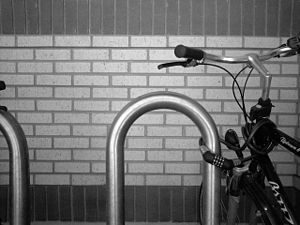

In [3]:
# Chargement des données de test et visualisation
bike_filepath = './images/bike.jpg'
bike_img = Image.open(bike_filepath).convert('L')
bike_np = np.array(bike_img)
display(bike_img)


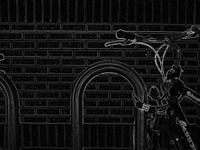
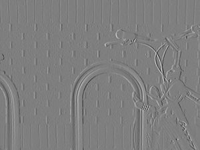
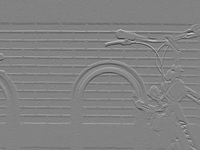


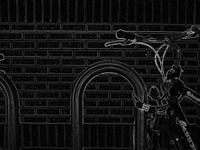
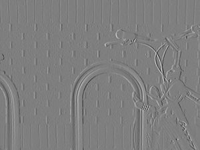
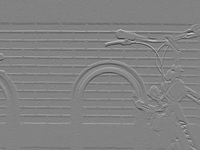

In [4]:
# Chargement des données de test et visualisation
bike_sobel_filepath = './images/bike_sobel.jpg'
bike_sobelx_filepath = './images/bike_sobelx.jpg'
bike_sobely_filepath = './images/bike_sobely.jpg'

bike_sobel_img = Image.open(bike_sobel_filepath).convert('L')
bike_sobelx_img = Image.open(bike_sobelx_filepath).convert('L')
bike_sobely_img = Image.open(bike_sobely_filepath).convert('L')

ipyplot.plot_images(images=[bike_sobel_img,bike_sobelx_img,bike_sobely_img],
                    labels=['wiki sobel','wiki sobel-x','wiki sobel-y'],
                    img_width = 200)

## Résultats

In [5]:
def get_img_from_float_array(array):
    normalized_array = 255*(array - np.min(array))/np.ptp(array)
    image = Image.fromarray(normalized_array.astype('uint8')).convert('L')
    return image   


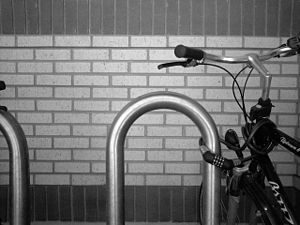
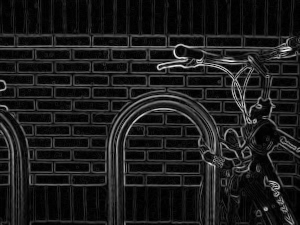
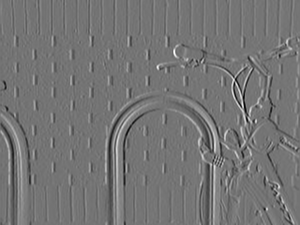
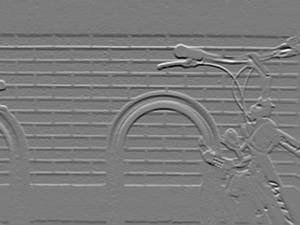


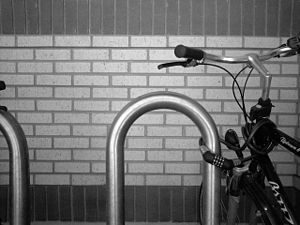
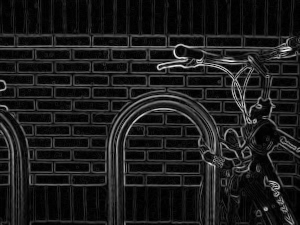
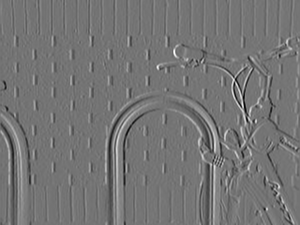
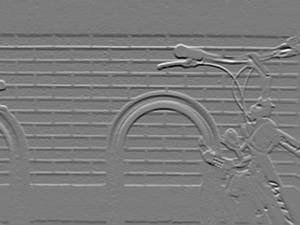

In [6]:
# Démontration sur l'exemple du vélo (cf. wikipédia)

# Kernel
diff_1D_np = np.array([[-1,0,1]])
tri_1D_np = np.array([[1,2,1]])
sobelx_ker_np = np.dot(tri_1D_np.T,diff_1D_np)
sobely_ker_np = np.dot(diff_1D_np.T,tri_1D_np)

# Convolve
bike_sobelx_np = ndimage.convolve(bike_np.astype('float')/255, sobelx_ker_np)
bike_sobely_np = ndimage.convolve(bike_np.astype('float')/255, sobely_ker_np)

# Gradient
bike_sobelmag_np = np.sqrt(bike_sobelx_np**2 + bike_sobely_np**2)

# Convert back to PIL image
bike_sobelmag_img = get_img_from_float_array(bike_sobelmag_np)
bike_sobelx_img = get_img_from_float_array(bike_sobelx_np)
bike_sobely_img = get_img_from_float_array(bike_sobely_np)

ipyplot.plot_images(images=[bike_img,bike_sobelmag_img,bike_sobelx_img,bike_sobely_img],
                    labels=['original','sobel-mag','sobel-x','sobel-y'],
                    img_width=300)

## Vérification


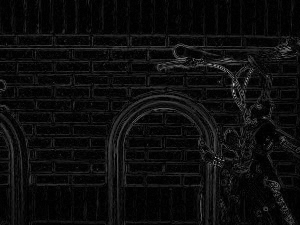
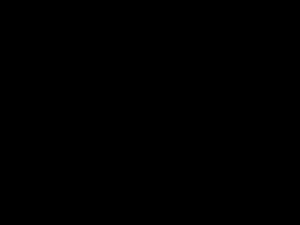


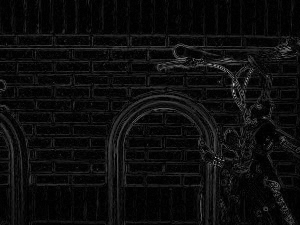
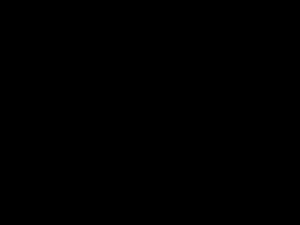

In [7]:
# Comparaison des résultats

# Wikipedia
wiki_compare_img = ImageChops.difference(bike_sobel_img,bike_sobelmag_img)

# Scikit-Image
bike_sobelsk_np = filters.sobel(np.array(bike_img).astype('float')/255.0)
bike_sobelsk_img = get_img_from_float_array(bike_sobelsk_np)
sk_compare_img = ImageChops.difference(bike_sobelsk_img,bike_sobelmag_img)

ipyplot.plot_images(images=[wiki_compare_img,sk_compare_img],
                    labels=['Différence avec Wikipedia','Différence avec Scikit-Image'],
                    img_width=300)

**Conclusions**
* Aucun écart observé entre l'implémentation de Sobel dans Scikit-Image et la nôtre.
* Un très léger écart est visible entre l'image de référence issue de Wikipédia et l'image obtenue avec notre implémentation maison. Cette différence est surement dûe à la manière de décoder et encoder les images (conversion en niveau de gris, normalisation, compression, etc...).
* Dans l'ensemble notre implémentation est très satisfante. Le niveau de performance est plus que correct et les images obtenues en sortie restent fidèles des images de référence.

# Mise en oeuvre des filtres classiques

Le module **skimage.filters** propose la plupart des filtres décrits ci-dessus pas défaut :
* skimage.filters.sobel
* skimage.filters.prewitt
* skimage.filters.laplace

Nous mettons en oeuvre ces différentes fonctions sur un exemple simple pour visualiser la différence de rendu. 

## Préliminaires

In [8]:
# Chargement des librairies de bases
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [9]:
# Chargement des librairies avancées
import ipyplot
from scipy import ndimage
from PIL import Image,ImageFilter,ImageEnhance,ImageChops
from sklearn.preprocessing import minmax_scale
from skimage.draw import disk, polygon
from skimage import exposure, filters

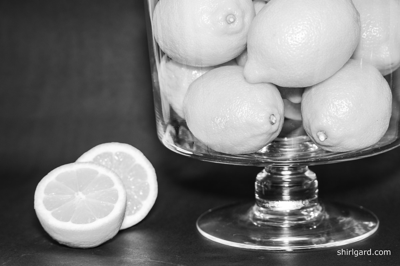

In [10]:
# Chargement des données de test et visualisation
lemon_filepath = './images/lemon.jpg'
lemon_img = Image.open(lemon_filepath).convert('L')
lemon_np = np.array(lemon_img)
display(lemon_img.resize((lemon_img.size[0]//3,lemon_img.size[1]//3)))

## Résultats

In [11]:
def get_img_from_float_array(array):
    normalized_array = 255*(array - np.min(array))/np.ptp(array)
    image = Image.fromarray(normalized_array.astype('uint8')).convert('L')
    return image   


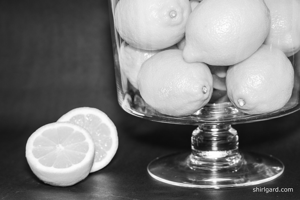
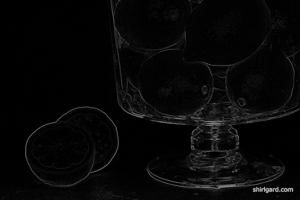
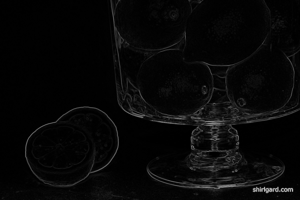
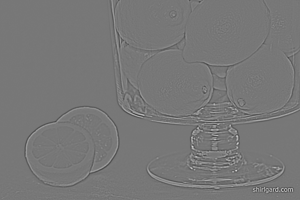


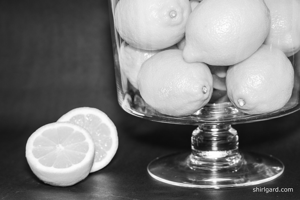
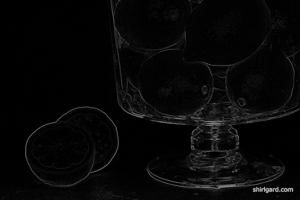
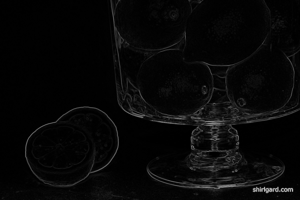
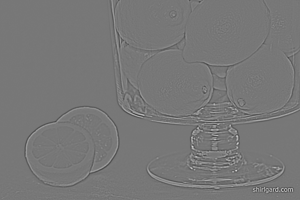

In [12]:
# Démontration sur l'exemple des citrons

# Convolve
lemon_sksobel_np = filters.sobel(lemon_np.astype('float')/255.0)
lemon_skprewitt_np = filters.prewitt(lemon_np.astype('float')/255)
lemon_skgaussian_np = filters.gaussian(lemon_np.astype('float')/255,sigma=2)
lemon_sklaplace_np = filters.laplace(lemon_skgaussian_np) # smooth first with gaussian

# Convert back to PIL image
lemon_sksobel_img = get_img_from_float_array(lemon_sksobel_np)
lemon_skprewitt_img = get_img_from_float_array(lemon_skprewitt_np)
lemon_sklaplace_img = get_img_from_float_array(lemon_sklaplace_np)

ipyplot.plot_images(images=[lemon_img,lemon_sksobel_img,
                            lemon_skprewitt_img,lemon_sklaplace_img],
                    labels=['original','scikit sobel','scikit prewitt','scikit laplace'],
                    img_width=300)

## Comparaison


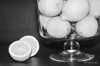
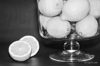
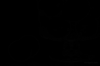
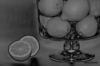
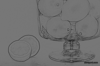
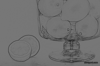


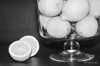
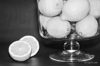
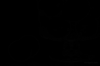
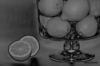
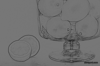
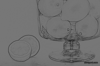

In [13]:
# Comparaison des résultats
lemon_results = [lemon_img,lemon_sksobel_img,
                 lemon_skprewitt_img,lemon_sklaplace_img]
filter_titles = ['original','sobel','prewitt','laplace']

comp_img = []
comp_labels =[]
for i in range(len(lemon_results)):
    for j in range(i):
        comp_img.append(ImageChops.difference(lemon_results[i],lemon_results[j]))
        comp_labels.append("%s - %s" %(filter_titles[j],filter_titles[i]))

ipyplot.plot_images(images=comp_img,labels=comp_labels,img_width=100)

Comme nous pouvions nous y attendre, Sobel et Prewitt sont très similaires. Pas ailleurs, nous remarquons que le niveau de bruit sur le filtre de laplace est très élevé même après un lissage avec un filtre Gaussien.

# Mise en oeuvre de l'algorithme de Canny

De nombreuseus implémentations de l'algorithme de Canny dans Python sont disponibles :
* [Sofiane Sahir] Article descriptif sur <a href="https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123">TowardsDataScience</a> et code sur <a href="https://github.com/FienSoP/canny_edge_detector">GitHub FienSoP</a>.
* [Abhisek Jana] Article descriptif sur <a href="https://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/">A Developer Diary</a> sur <a href="https://github.com/adeveloperdiary/blog/tree/master/Computer_Vision/Sobel_Edge_Detection">GitHub adeveloperdiary</a>.
* [Atul Krishna Singh and Pankaj Kang] Article descriptif sur <a href="https://theailearner.com/2019/05/22/canny-edge-detector/">The AI Learner</a>.

Cet algorithme est aussi disponible dans certaines librairies par défaut :
* [Scikit-Image] <a href="https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny">skimage.feature.canny</a>
* [OpenCV] <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html">cv2.Canny()</a>

<br>Ci-dessous :
<br>\- Nous mettons en oeuvre l'algorithme de Canny en nous appuyant sur le module **skimage.feature** pour démontrer ses capacités de détection de contours et la dépendance vis-à-vis des paramètres de l'algorithme.
<br>\- Nous proposons un outil interactif basé sur la librairie **ipywidgets** pour explorer l'impact des paramètres sur le traitement des images.

## Préliminaires

In [14]:
# Chargement des librairies de bases
import numpy as np

In [15]:
# Chargement des librairies avancées
from PIL import Image
from skimage import feature
from ipywidgets import interact
import ipywidgets as widgets

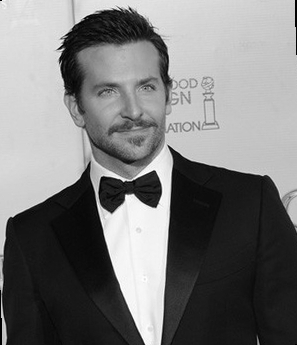

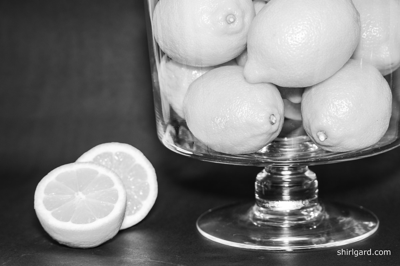

In [16]:
# Chargement des données de test et visualisation
portrait_filepath = './images/portrait.jpg'
portrait_img = Image.open(portrait_filepath).convert('L')
portrait_np = np.array(portrait_img)

lemon_filepath = './images/lemon.jpg'
lemon_img = Image.open(lemon_filepath).convert('L')
lemon_img = lemon_img.resize((lemon_img.size[0]//3,lemon_img.size[1]//3))
lemon_np = np.array(lemon_img)

image_dict = {"Portrait":portrait_np,"Lemon":lemon_np}

display(portrait_img)
display(lemon_img)

## Résultats

Traitement avec les paramètres par défaut :

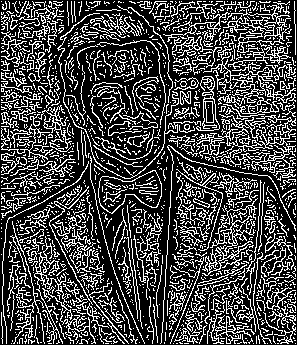

In [17]:
# Résultat avec les paramètres par défaut
canny_portrait = feature.canny(portrait_np.astype('float'))
display(Image.fromarray(canny_portrait))

Traitement avec des paramètres adaptés :

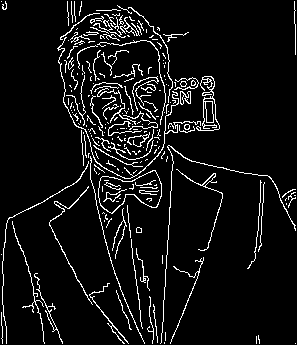

In [18]:
# Résultat optimisé
canny_portrait = feature.canny(portrait_np.astype('float'),
                               sigma=1,
                               low_threshold=0.5,
                               high_threshold=0.8,
                               use_quantiles = True)
display(Image.fromarray(canny_portrait))

## Module interactif

In [19]:
# Définition de la fonction à paramétriser
def canny_widget(image,sigma=1,low_threshold=0.1,high_threshold=0.2):
    array = image_dict[image]
    out = feature.canny(array.astype('float'),
                  sigma=sigma,
                  low_threshold=low_threshold,
                  high_threshold=high_threshold,
                  use_quantiles = True)
    display(Image.fromarray(out))

In [35]:
# Définition des curseurs
sigma = widgets.FloatSlider(min=0.0, max=5.0, step=0.1, 
                            value=1.0,description='sigma')
low_threshold = widgets.FloatSlider(min=0.0, max=1.0, step=0.05, 
                                    value=0.1,description='low')
high_threshold = widgets.FloatSlider(min=0.0, max=1.0, step=0.05, 
                                     value=0.2,description='high')

In [36]:
# Lancement du module
canny = widgets.interact(canny_widget,image=['Portrait','Lemon'],
                 sigma=sigma,low_threshold=low_threshold,high_threshold=high_threshold)

interactive(children=(Dropdown(description='image', options=('Portrait', 'Lemon'), value='Portrait'), FloatSli…